In [22]:
import os
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
% matplotlib inline

In [23]:
con = sql.connect('Equity.sql')

In [24]:
df = pd.read_csv("Revenue_Aid_2016.csv")

In [25]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [26]:
df

,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [27]:
df.to_sql("equity", con, schema=None,
         if_exists='replace', index=True, index_label=None,
         chunksize=None, dtype=None)

In [28]:
drop_table_sql = "DROP TABLE IF EXISTS equity;"

In [29]:
df1 = pd.read_sql("SELECT * FROM Equity", con)
df1

,index,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [30]:
revenue = pd.read_sql("SELECT institution_name, grand_total_revenue FROM Equity", con)
revenue

,institution_name,grand_total_revenue
0,University of Louisville,122445304
1,University of Kentucky,122307014
2,Indiana University,104819338


In [31]:
aid = pd.read_sql("SELECT institution_name, mens_team_athletic_student_aid, womens_team_athletic_student_aid FROM Equity", con)
aid

,institution_name,mens_team_athletic_student_aid,womens_team_athletic_student_aid
0,University of Louisville,6249734,5907156
1,University of Kentucky,7119237,4874527
2,Indiana University,8487821,7039065


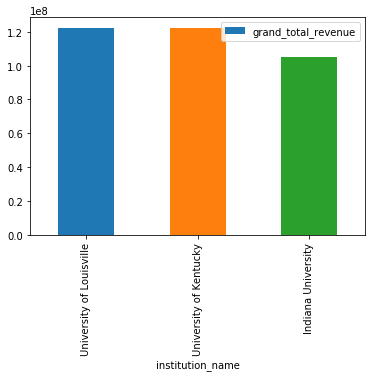

In [47]:
df1.plot(kind='bar', x='institution_name', y='grand_total_revenue')

<function matplotlib.pyplot.show(*args, **kw)>

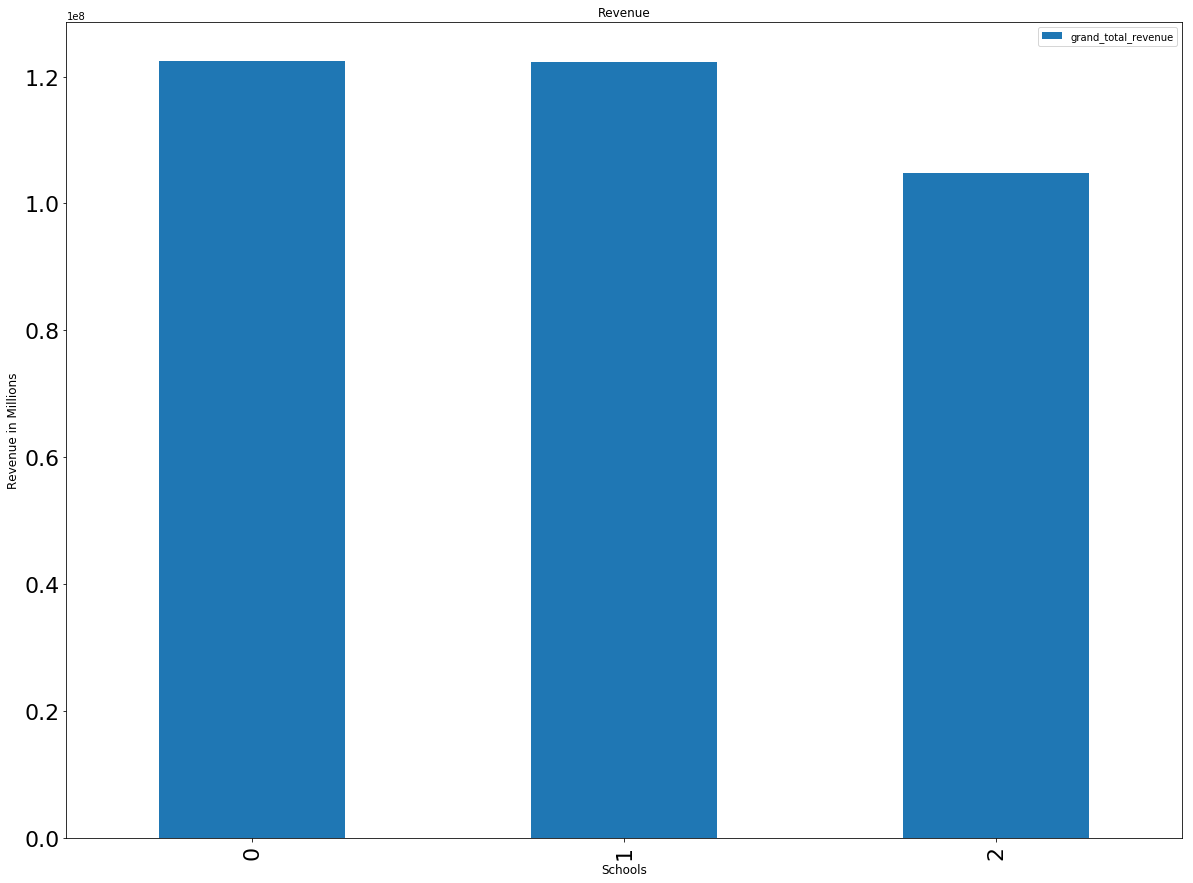

In [43]:
ax = revenue[['institution_name', 'grand_total_revenue']].plot(kind='bar',
                                                              title = "Revenue",
                                                              figsize=(20, 15),
                                                              legend=True,
                                                              fontsize=22)
ax.set_xlabel("Schools", fontsize=12)
ax.set_ylabel("Revenue in Millions", fontsize=12)
plt.show